# Métodos de control de velocidad del Motor de Corriente Directa de Excitación Independiente

## Característica mecánica
Recordamos la ecuación de la característica mecánica del MCDEI

$$\omega = {U \over {k\phi}} - {R_a \over (k\phi)^2} M$$

Veamos los datos de chapa para un motor ejemplo: PH-35.

In [1]:
Un = 220 # V
Ra = 0.194
In = 30 # A
Pn = 5.6 # Kw
Nn = 1000 # rpm
Ra = 0.48 # ohm
Rp = 228 # ohm

In [2]:
import numpy as np

Calculamos $k\phi = {{U_n - I_{an}*R_a-2} \over {\omega_n}}$ y $I_{an} = I_n - I_{exc}$ donde $I_{exc}={U_n \over R_p}$

In [3]:
Iexc = Un/Rp
Ian = In - Iexc
wn = Nn*np.pi/30
kfi = (Un - Ian*Ra - 2)/wn
print(F"kfi={kfi:.2f}Vs")

kfi=1.95Vs


## Variación de la resistencia de armdura
![circuito](img/MCDEI_resistencia.png)

Vamos a poner 3 resistencias adicionales distintas

In [4]:
R1 = 0.4
R2 = 0.8
R3 = 1.8

Evaluamos un vector de momentos para los 4 valores de resistencia da armadura.

In [5]:
Mn = kfi*Ian
m = np.linspace(-Mn, 3*Mn, 100)
w_nat = Un/kfi-Ra*m/kfi**2
w_r1 = Un/kfi-(Ra+R1)*m/kfi**2
w_r2 = Un/kfi-(Ra+R2)*m/kfi**2
w_r3 = Un/kfi-(Ra+R3)*m/kfi**2

Ahora trazamos las 4 curvas

Text(0, 0.5, '$\\omega$ (rad/s)')

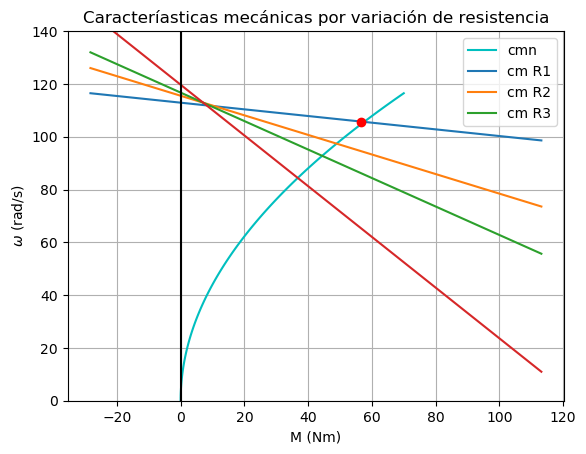

In [13]:
import matplotlib.pyplot as pyl


# Característica mecánica de la carga
wcarga = np.linspace(0, max(w_nat), 100)
Mcarga = Mn*(wcarga/wn)**2
pyl.plot(Mcarga, wcarga, 'c')

# Ejes
y = np.linspace(0,140,100)
ceros = np.zeros(100)

pyl.plot(m, w_nat, m, w_r1, m, w_r2, m, w_r3, ceros, y, 'k')
pyl.plot(Mn, Un/kfi-Ra*Mn/kfi**2, 'ro')
pyl.title("Caracteríasticas mecánicas por variación de resistencia")
pyl.ylim((0,140))
pyl.grid()
pyl.legend(["cmn", "cm R1", "cm R2", "cm R3",])
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** limitado por el número de resistencias. Dmáx= 2:1 ; 3:1.

**Gradualidad** a saltos por la gran corriente de armadura queno permite usar reóstato.

**Estabilidad** empeora con la disminución de la rigidez $\beta={(k\phi)^2 \over {R_a+R_{ad}}}$.

**Factibilidad Económica** Inversión inicial baja y circuito simple. Pero la eficiencia energética es mala pues se disipa gran potencia en las resistencias (hasta el 50% de la energía consumida).

**Carga permisible** Carga tipo ventilador y en algunos casos dentro de un rango limitado, carga de momento constante.

**Dirección del control** Por debajo de las velocidades básicas.

## Disminución del flujo
![circuito](img/MCDEI_resistencia.png)
Esta vez se usan las resistencias de armadura para el arranque y se varía el flujo con el reóstato del circuito de excitación.
Vamos a tomar 3 valores distintos de $k\phi$

In [7]:
kfi1 = 0.75*kfi
kfi2 = 0.6*kfi
kfi3 = 0.5*kfi

m = np.linspace(-0.5*Mn, 2*Mn, 100)

w_nat = Un/kfi-Ra*m/kfi**2
w_kfi1 = Un/kfi1-Ra*m/kfi1**2
w_kfi2 = Un/kfi2-Ra*m/kfi2**2
w_kfi3 = Un/kfi3-Ra*m/kfi3**2

Ahora trazamos las 4 curvas

Text(0, 0.5, '$\\omega$ (rad/s)')

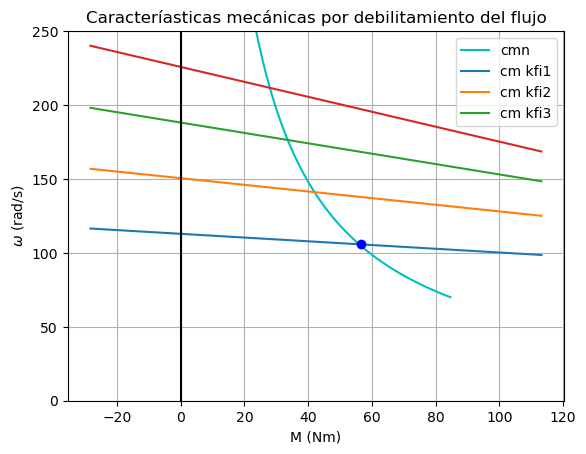

In [14]:
y = np.linspace(0,250,100)

# Característica mecánica de la carga
wcarga = np.linspace(70, 250, 100)
Mcarga = Mn*wn/wcarga
pyl.plot(Mcarga, wcarga, 'c')

# Características mecánicas
pyl.plot(m, w_nat, m, w_kfi1, m, w_kfi2, m, w_kfi3, ceros, y, 'k')
pyl.plot(Mn, Un/kfi-Ra*Mn/kfi**2, 'bo')
pyl.title("Caracteríasticas mecánicas por debilitamiento del flujo")
pyl.ylim((0,250))
pyl.grid()
pyl.legend(["cmn", "cm kfi1", "cm kfi2", "cm kfi3",])
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** Dmáx= 4:1 ; 5:1 y en algunos casos puede llegar a 8:1.

**Gradualidad** es suave pues la pequeña corriente de excitación permite usar reóstato.

**Estabilidad** empeora con la disminución de la rigidez $\beta={(k\phi)^2 \over {R_a+R_{ad}}}$.

**Factibilidad Económica** Inversión inicial baja y circuito simple. La eficiencia energética es buena pues se disipa poca potencia en el circuito adicional de excitación.

**Carga permisible** Carga de potencia constante.

**Dirección del control** Por encima de las velocidades básicas.

## Disminución de la tensión de armadura
![circuito](img/WardLeonard.png)
![circuito](img/Controlled-Rectifier-Fed-DC-Drives.jpg)
![circuito](img/chopper.jpg)
Vamos a tomar 3 valores distintos de tensión

In [9]:
Un1 = 200
Un2 = 180
Un3 = 160

w_U1 = Un1/kfi-Ra*m/kfi**2
w_U2 = Un2/kfi-Ra*m/kfi**2
w_U3 = Un3/kfi-Ra*m/kfi**2

Text(0, 0.5, '$\\omega$ (rad/s)')

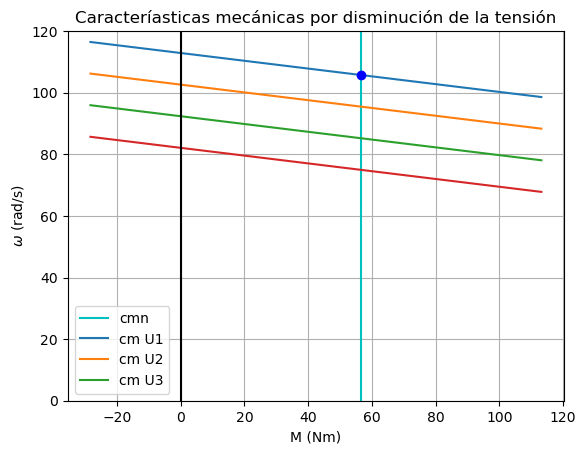

In [18]:
y = np.linspace(0,120,100)

# Característica mecánica de la carga
pyl.plot(Mn*np.ones(y.shape), y,  'c')

# Características mecánicas
pyl.plot(m, w_nat, m, w_U1, m, w_U2, m, w_U3, ceros, y, 'k')
pyl.plot(Mn, Un/kfi-Ra*Mn/kfi**2, 'bo')
pyl.title("Caracteríasticas mecánicas por disminución de la tensión")
pyl.ylim((0,120))
pyl.grid()
pyl.legend(["cmn", "cm U1", "cm U2", "cm U3",])
pyl.xlabel("M (Nm)")
pyl.ylabel("$\omega$ (rad/s)")

**Diapasón** Dmáx= 8:1 en lazo abierto y puede llegar a 200:1 en lazo cerrado.

**Gradualidad** es suave pues depende del ángulo de disparo (en un rectificador controlado) o del ciclo útil (en un chopper CD-CD), o la corriente de excitación (generador-motor).

**Estabilidad** se mantiene aproximadamente constante aunque disminuye ligeramente la rigidez por las resistencias adicionales del circuito de armadura.

**Factibilidad Económica** Inversión inicial relativamente alta. La eficiencia energética es buena.

**Carga permisible** Carga de momento constante (cualquier tipo).

**Dirección del control** Por debajo de las velocidades básicas.